## Load Libraries

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA, TruncatedSVD, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.manifold import TSNE

## Load Datasets

In [2]:
train_df = pd.read_csv("./train/train.csv")
test_df = pd.read_csv("./test/test.csv")

## Data Analysis

### Data Evaluate

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [4]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
train_df.tail()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
4454,ff85154c8,1065000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,48000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,2800000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4458,ffeb15d25,20000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [6]:
train_df[train_df.duplicated()]

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466


In [7]:
train_df.columns[train_df.isnull().sum() != 0]

Index([], dtype='object')

(array([ 2783.,   598.,   401.,   157.,   228.,    74.,    55.,    64.,
           39.,    60.]),
 array([  3.00000000e+04,   4.02700000e+06,   8.02400000e+06,
          1.20210000e+07,   1.60180000e+07,   2.00150000e+07,
          2.40120000e+07,   2.80090000e+07,   3.20060000e+07,
          3.60030000e+07,   4.00000000e+07]),
 <a list of 10 Patch objects>)

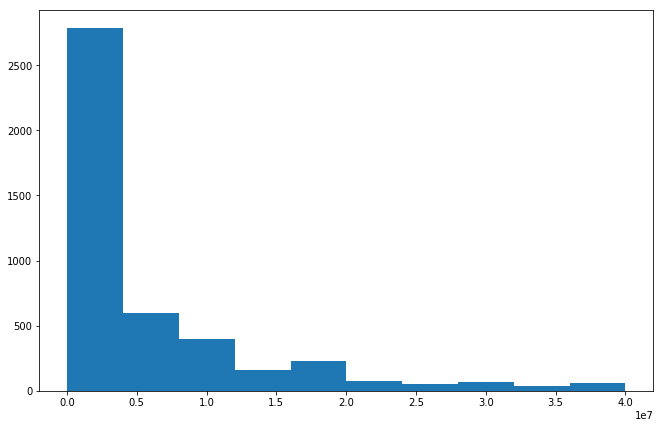

In [8]:
plt.figure(figsize=(11,7))
plt.hist(train_df.target)

(array([ 197.,  192.,  282.,  387.,  510.,  656.,  635.,  606.,  542.,  452.]),
 array([ 10.30898599,  11.0285264 ,  11.7480668 ,  12.46760721,
         13.18714761,  13.90668802,  14.62622842,  15.34576882,
         16.06530923,  16.78484963,  17.50439004]),
 <a list of 10 Patch objects>)

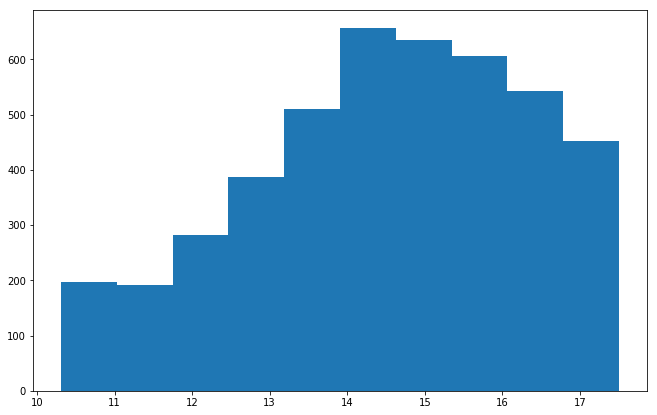

In [9]:
plt.figure(figsize=(11,7))
plt.hist(np.log1p(train_df.target))

In [10]:
test_df.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


### Data Wrangle

#### Check and Remove Constant Features

In [12]:
unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape

(256, 2)

In [13]:
train_df.drop(constant_df.col_name.tolist(), axis=1, inplace=True)
test_df.drop(constant_df.col_name.tolist(), axis=1, inplace=True)

In [14]:
X = train_df.drop(['ID', 'target'], axis=1)
y = np.log1p(train_df['target'])
X_test = test_df.drop(['ID'], axis=1)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=23)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4735 entries, 48df886f9 to 9fc776466
dtypes: float64(1844), int64(2891)
memory usage: 161.1 MB


In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4735 entries, 48df886f9 to 9fc776466
dtypes: float64(4735)
memory usage: 1.7 GB


#### PCA

In [60]:
"""
def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

### Get the optimal number of components
pca = PCA(random_state=23)
pca_train = pca.fit_transform(X)
n_comp = _get_number_components(pca, threshold=0.85)
n_comp
"""

'\ndef _get_number_components(model, threshold):\n    component_variance = model.explained_variance_ratio_\n    explained_variance = 0.0\n    components = 0\n\n    for var in component_variance:\n        explained_variance += var\n        components += 1\n        if(explained_variance >= threshold):\n            break\n    return components\n\n### Get the optimal number of components\npca = PCA(random_state=23)\npca_train = pca.fit_transform(X)\nn_comp = _get_number_components(pca, threshold=0.85)\nn_comp\n'

In [61]:
n_comp = 30

In [62]:
pca = PCA(n_components=n_comp, random_state=23)
pca_train = pca.fit_transform(X)
pca_test = pca.transform(X_test)

#### tSVD

In [63]:
tsvd = TruncatedSVD(n_components=n_comp, random_state=23)
tsvd_train = tsvd.fit_transform(X)
tsvd_test = tsvd.transform(X_test)

#### ICA

In [64]:
ica = FastICA(n_components=n_comp, random_state=23)
ica_train = ica.fit_transform(X)
ica_test = ica.transform(X_test)

#### GRP

In [65]:
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=23)
grp_train = grp.fit_transform(X)
grp_test = grp.transform(X_test)

#### SRP

In [66]:
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=23)
srp_train = srp.fit_transform(X)
srp_test = srp.transform(X_test)

####  Factor Analysis

In [67]:
fa = FactorAnalysis(n_components=n_comp, random_state=23)
fa_train = fa.fit_transform(X)
fa_test = fa.transform(X_test)

#### Append decomposition components

In [69]:
for i in range(1, n_comp + 1):
    X['pca_' + str(i)] = pca_train[:, i - 1]
    X_test['pca_' + str(i)] = pca_test[:, i - 1]

    X['ica_' + str(i)] = ica_train[:, i - 1]
    X_test['ica_' + str(i)] = ica_test[:, i - 1]

    X['tsvd_' + str(i)] = tsvd_train[:, i - 1]
    X_test['tsvd_' + str(i)] = tsvd_test[:, i - 1]

    X['grp_' + str(i)] = grp_train[:, i - 1]
    X_test['grp_' + str(i)] = grp_test[:, i - 1]

    X['srp_' + str(i)] = srp_train[:, i - 1]
    X_test['srp_' + str(i)] = srp_test[:, i - 1]
    
    X['fa_' + str(i)] = fa_train[:, i - 1]
    X_test['fa_' + str(i)] = fa_test[:, i - 1]

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4915 entries, 48df886f9 to fa_30
dtypes: float64(2024), int64(2891)
memory usage: 167.2 MB


In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4915 entries, 48df886f9 to fa_30
dtypes: float64(4915)
memory usage: 1.8 GB


## Model

### Lightgbm

In [72]:
lgbtrain = lgb.Dataset(X, label=y)

#### Cross Validation

In [73]:
lgbm_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    "learning_rate": 0.01,
    "num_leaves": 180,
    "feature_fraction": 0.50,
    "bagging_fraction": 0.50,
    'bagging_freq': 4,
    "max_depth": -1,
    "reg_alpha": 0.3,
    "reg_lambda": 0.1,
    "min_child_weight":10,
    'zero_as_missing':True 
    }

lgb_cv = lgb.cv(
    params = lgbm_params,
    train_set = lgbtrain,
    num_boost_round=2000,
    stratified=False,
    nfold = 5,
    verbose_eval=50,
    seed = 23,
    early_stopping_rounds=20)

[50]	cv_agg's rmse: 1.5611 + 0.0251955
[100]	cv_agg's rmse: 1.46506 + 0.0221548
[150]	cv_agg's rmse: 1.41732 + 0.0242559
[200]	cv_agg's rmse: 1.39379 + 0.0245737
[250]	cv_agg's rmse: 1.38291 + 0.0253087
[300]	cv_agg's rmse: 1.37629 + 0.0252922
[350]	cv_agg's rmse: 1.37321 + 0.0258339
[400]	cv_agg's rmse: 1.37116 + 0.0260377
[450]	cv_agg's rmse: 1.37005 + 0.0258589
[500]	cv_agg's rmse: 1.36974 + 0.0257512


In [74]:
np.argmin(lgb_cv['rmse-mean'])

484

#### Tune Paramters

In [75]:
best_params = {}
min_merror = np.inf

In [82]:
"""
for learning_rate in [0.008, 0.01, 0.012, 0.014]:
    cv_results = lgb.cv(
        params = lgbm_params,
        train_set = lgbtrain,
        num_boost_round=10000,
        stratified=False,
        nfold = 5,
        verbose_eval=50,
        seed = 23,
        early_stopping_rounds=20)

    mean_error = min(cv_results['rmse-mean'])
    boost_rounds = np.argmin(cv_results['rmse-mean'])
    
    if mean_error < min_merror:
        min_merror = mean_error
        best_params["learning_rate"] = learning_rate
        
best_params["learning_rate"]       
lgbm_params["learning_rate"] = best_params["learning_rate"]
"""

[50]	cv_agg's rmse: 1.58886 + 0.0263074
[100]	cv_agg's rmse: 1.4956 + 0.0245418
[150]	cv_agg's rmse: 1.44286 + 0.0243171
[200]	cv_agg's rmse: 1.41161 + 0.0237258
[250]	cv_agg's rmse: 1.39531 + 0.0241725
[300]	cv_agg's rmse: 1.38466 + 0.0243657
[350]	cv_agg's rmse: 1.38007 + 0.0242104
[400]	cv_agg's rmse: 1.37738 + 0.023898
[450]	cv_agg's rmse: 1.3757 + 0.0237498
[500]	cv_agg's rmse: 1.37458 + 0.0235173
[550]	cv_agg's rmse: 1.37351 + 0.0236577
[600]	cv_agg's rmse: 1.37327 + 0.0231741
[50]	cv_agg's rmse: 1.58886 + 0.0263074
[100]	cv_agg's rmse: 1.4956 + 0.0245418
[150]	cv_agg's rmse: 1.44286 + 0.0243171
[200]	cv_agg's rmse: 1.41161 + 0.0237258
[250]	cv_agg's rmse: 1.39531 + 0.0241725
[300]	cv_agg's rmse: 1.38466 + 0.0243657
[350]	cv_agg's rmse: 1.38007 + 0.0242104
[400]	cv_agg's rmse: 1.37738 + 0.023898
[450]	cv_agg's rmse: 1.3757 + 0.0237498
[500]	cv_agg's rmse: 1.37458 + 0.0235173
[550]	cv_agg's rmse: 1.37351 + 0.0236577
[600]	cv_agg's rmse: 1.37327 + 0.0231741
[50]	cv_agg's rmse: 1.58

In [78]:
lgb_reg = lgb.train(lgbm_params, lgbtrain, num_boost_round = np.argmin(lgb_cv['rmse-mean']) + 1, verbose_eval=50)

In [79]:
pred_test = lgb_reg.predict(X_test)
sub_df = pd.DataFrame({"ID":test_df["ID"].values})
sub_df["target"] = np.expm1(pred_test)
sub_df.to_csv("submission.csv", index=False)

In [80]:
sub_df

,ID,target
0,000137c73,2.106229e+06
1,00021489f,1.810798e+06
2,0004d7953,2.083380e+06
3,00056a333,9.167520e+06
4,00056d8eb,2.553623e+06
5,0005fc190,1.594334e+06
6,000787e86,1.845299e+06
7,0008510a0,2.513176e+06
8,000895faf,2.579587e+06
9,000986fba,3.024512e+06
